### Fakeddit

### Setup Environment:
* [Paper](https://arxiv.org/pdf/1911.03854.pdf)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import process_labels, split_data
from src.classifiers_base import preprocess_df

from transformers import BertTokenizer

from src.multimodal_data_loader import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_base import train_early_fusion, train_late_fusion

In [2]:
PATH = 'datasets/fakeddit/'

In [3]:
text_path = os.path.join(PATH, 'labels_subset.csv')
images_path = os.path.join(PATH, 'images')

## Get data

In [4]:
df = pd.read_csv(text_path)
df

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,split
0,michaelconfoy,loose talk got there first keep it under your ...,1.429942e+09,i.imgur.com,True,33snxf.jpg,https://external-preview.redd.it/TfwZkzBSsqgq0...,NaN,6.0,70,propagandaposters,"""Loose talk got there first! Keep it under you...",0.98,0,1,5,train
1,SaltMineForeman,this tree at my campsite naturally grew a hear...,1.554421e+09,i.imgur.com,True,b9k2ta.jpg,https://external-preview.redd.it/ulTUeOqBi2y7F...,NaN,2.0,30,mildlyinteresting,This tree at my campsite naturally grew a hear...,0.89,1,0,0,train
2,Shawn_666,fdr addressing the nation,1.522982e+09,i.redd.it,True,8a5wy9.jpg,https://preview.redd.it/fyop34q987q01.png?widt...,NaN,1.0,12,fakehistoryporn,FDR addressing the nation (1932),0.80,0,2,2,train
3,YOLO2THEMAX,face morph,1.448948e+09,NaN,True,cxiu2qb.jpg,http://i.imgur.com/nLdvOJ5.jpg,3urf4a,NaN,2,psbattle_artwork,Face morph,NaN,0,2,4,train
4,FarMojo,a japanese kamikaze pilot of the sixth air arm...,1.559169e+09,i.redd.it,True,bul96p.jpg,https://preview.redd.it/3ro69vkv88131.jpg?widt...,NaN,0.0,8,fakehistoryporn,A Japanese kamikaze pilot of the sixth air arm...,0.75,0,2,2,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68073,Anazron,giant flesheating spiders could soon be moving...,1.472864e+09,grimsbytelegraph.co.uk,True,50whzb.jpg,https://external-preview.redd.it/HEa-SZzApziHx...,NaN,33.0,1587,savedyouaclick,Giant 'flesh-eating' spiders could soon be mov...,0.96,0,2,5,val
68074,CaptainBubblesMcGee,birdie fjord,1.514092e+09,i.redd.it,True,7lte89.jpg,https://preview.redd.it/pbzko489ys501.jpg?widt...,NaN,1.0,25,fakealbumcovers,Birdie - Fjord,1.00,0,2,1,val
68075,prohitman,spittin hot fire and hairballs,1.456299e+09,NaN,True,d0bptg9.jpg,http://i.imgur.com/aABgTcA.jpg,479m43,NaN,99,psbattle_artwork,Spittin' hot fire... and hairballs,NaN,0,2,4,val
68076,lux514,supreme court lets full trump travel ban take ...,1.512429e+09,amp.cnn.com,True,7hlb60.jpg,https://external-preview.redd.it/Cqtqrno3dAQVv...,NaN,1.0,3,neutralnews,Supreme Court lets full Trump travel ban take ...,1.00,1,0,0,val


## Data Perparation

In [5]:
# Select features and labels vectors
text_columns = 'title'
image_columns = 'id'
label_columns = '2_way_label'

df = preprocess_df(df, image_columns, images_path)

# Split the data
train_df, test_df = split_data(df)

# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

100%|██████████| 68078/68078 [00:35<00:00, 1902.61it/s]


Train Shape: (56214, 17)
Test Shape: (5911, 17)


In [6]:
train_df

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,split
0,michaelconfoy,loose talk got there first keep it under your ...,1.429942e+09,i.imgur.com,True,datasets/fakeddit/images/33snxf.jpg,https://external-preview.redd.it/TfwZkzBSsqgq0...,NaN,6.0,70,propagandaposters,"""Loose talk got there first! Keep it under you...",0.98,0,1,5,train
1,SaltMineForeman,this tree at my campsite naturally grew a hear...,1.554421e+09,i.imgur.com,True,datasets/fakeddit/images/b9k2ta.jpg,https://external-preview.redd.it/ulTUeOqBi2y7F...,NaN,2.0,30,mildlyinteresting,This tree at my campsite naturally grew a hear...,0.89,1,0,0,train
2,Shawn_666,fdr addressing the nation,1.522982e+09,i.redd.it,True,datasets/fakeddit/images/8a5wy9.jpg,https://preview.redd.it/fyop34q987q01.png?widt...,NaN,1.0,12,fakehistoryporn,FDR addressing the nation (1932),0.80,0,2,2,train
3,YOLO2THEMAX,face morph,1.448948e+09,NaN,True,datasets/fakeddit/images/cxiu2qb.jpg,http://i.imgur.com/nLdvOJ5.jpg,3urf4a,NaN,2,psbattle_artwork,Face morph,NaN,0,2,4,train
4,FarMojo,a japanese kamikaze pilot of the sixth air arm...,1.559169e+09,i.redd.it,True,datasets/fakeddit/images/bul96p.jpg,https://preview.redd.it/3ro69vkv88131.jpg?widt...,NaN,0.0,8,fakehistoryporn,A Japanese kamikaze pilot of the sixth air arm...,0.75,0,2,2,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56241,crazeecatlady801,father and son,1.388601e+09,imgur.com,True,datasets/fakeddit/images/1u64tc.jpg,https://external-preview.redd.it/SSY_cSjrDTbTo...,NaN,0.0,3,pareidolia,Father and son.,0.81,0,2,2,train
56242,dirtydaversfg,well hidden perfect fit owl,1.501643e+09,i.imgur.com,True,datasets/fakeddit/images/6r1e9l.jpg,https://external-preview.redd.it/CrOdO-iprQvYL...,NaN,133.0,21307,photoshopbattles,PsBattle: Well hidden perfect fit owl,0.93,1,0,0,train
56243,mealzer,bought a craft gingerale and it had this under...,1.553030e+09,i.imgur.com,True,datasets/fakeddit/images/b330ti.jpg,https://external-preview.redd.it/8sn7r4Ajyz1aJ...,NaN,7.0,12,mildlyinteresting,Bought a craft gingerale and it had this under...,0.88,1,0,0,train
56244,NaN,nineeleven terror organization operating under...,1.536688e+09,imgur.com,True,datasets/fakeddit/images/9ezs3y.jpg,https://external-preview.redd.it/5FADs-75THyBG...,NaN,0.0,10,fakehistoryporn,NineEleven - Terror Organization Operating Und...,0.75,0,2,2,train


In [7]:
# Instantiate tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [8]:
train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

### Models

In [9]:
if label_columns == '2_way_label':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
The number of parameters of the model are: 197121


/home/datascience/conda/retina_embeddings_v0_0_1/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/datascience/conda/retina_embeddings_v0_0_1/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/datascience/conda/retina_embeddings_v0_0_1/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/datascience/conda/retina_embeddings_v0_0_1/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/datascience/conda/retina_embeddings_v0_0_1/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed i

Epoch 1/5 - Test Accuracy: 0.8743
Epoch 1/5 - Training Time: 1454.10 seconds | Inference Time: 162.20 seconds
Epoch 2/5 - Test Accuracy: 0.8785
Epoch 2/5 - Training Time: 1489.95 seconds | Inference Time: 148.69 seconds
Epoch 3/5 - Test Accuracy: 0.8824
Epoch 3/5 - Training Time: 1450.39 seconds | Inference Time: 168.99 seconds
Epoch 4/5 - Test Accuracy: 0.8900
Epoch 4/5 - Training Time: 1454.43 seconds | Inference Time: 161.43 seconds
Epoch 5/5 - Test Accuracy: 0.8927
Epoch 5/5 - Training Time: 1433.39 seconds | Inference Time: 160.27 seconds
Average Training Time per Epoch: 1456.45 seconds
Total Training Time per Epoch: 7282.27 seconds
Average Inference Time per Epoch: 160.32 seconds
Total Inference Time per Epoch: 801.58 seconds


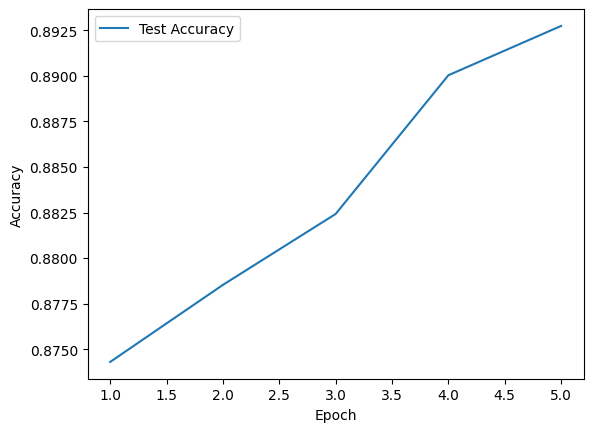

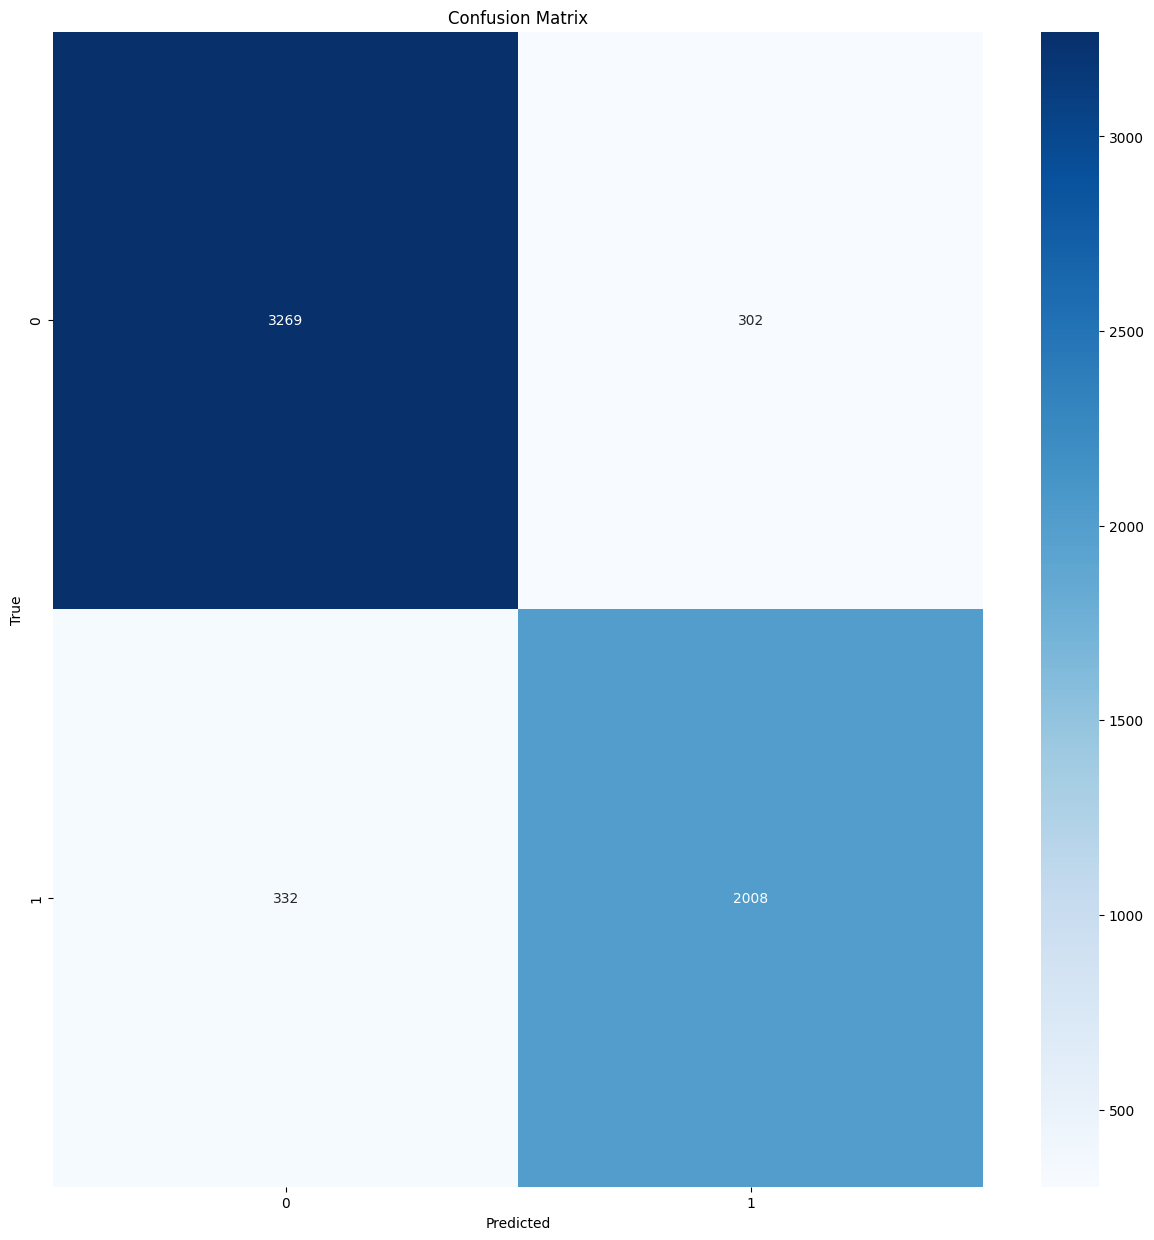

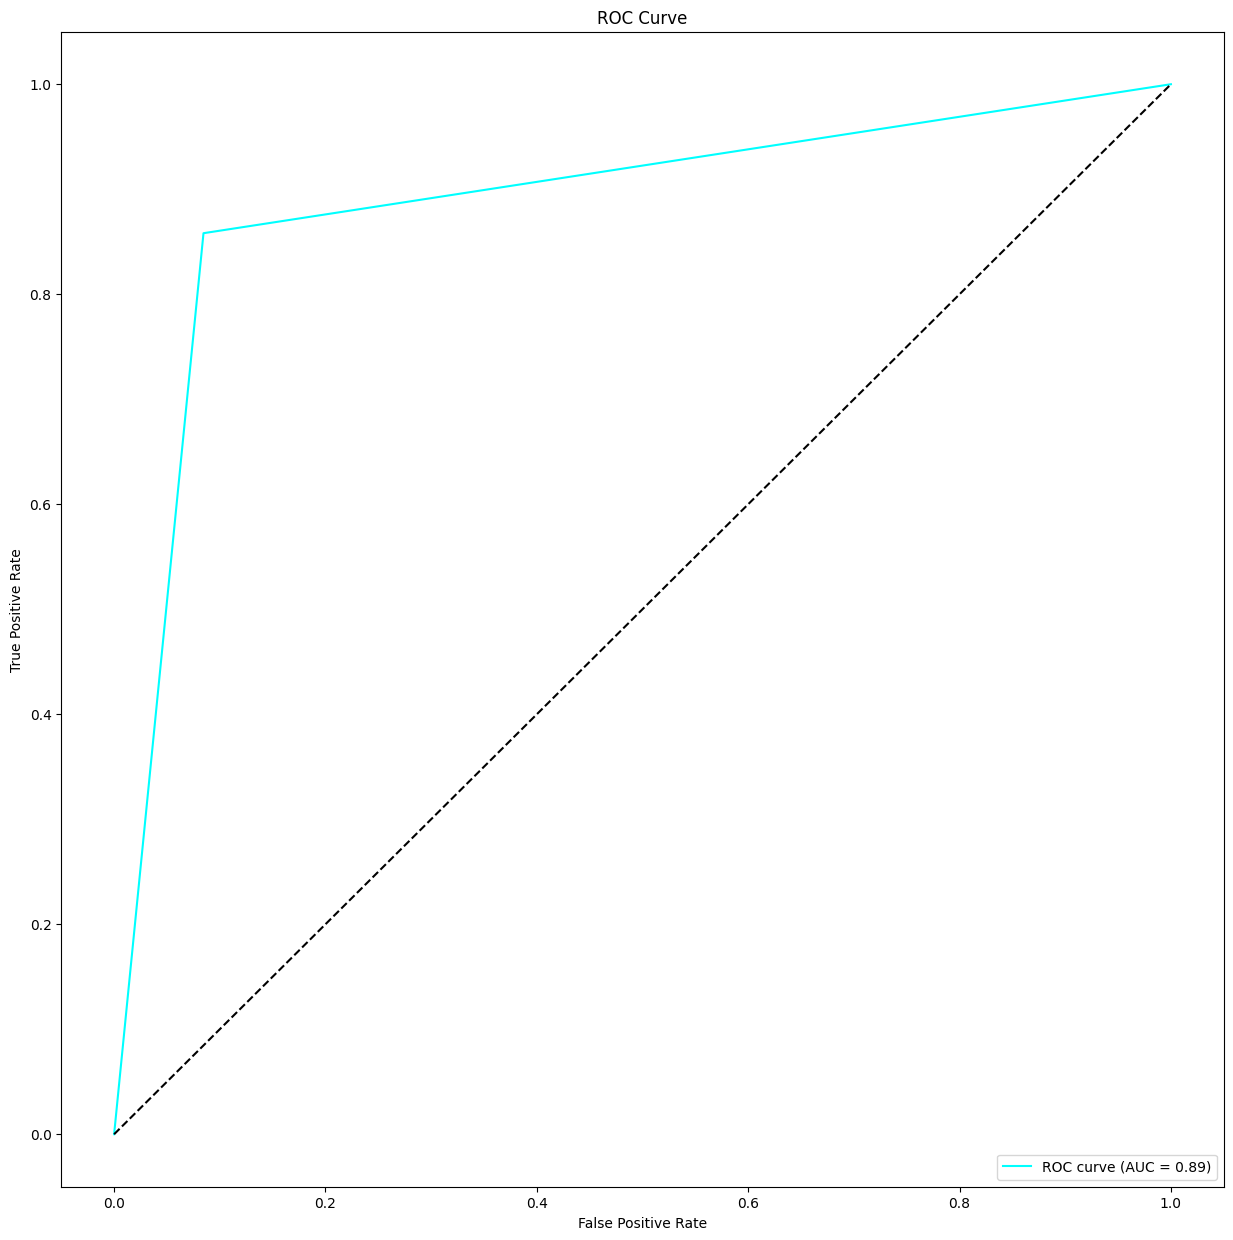

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      3571
         1.0       0.87      0.86      0.86      2340

    accuracy                           0.89      5911
   macro avg       0.89      0.89      0.89      5911
weighted avg       0.89      0.89      0.89      5911



In [10]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, output_size, num_epochs=5, multilabel=multilabel, report=True, lr=0.001)

Training Late Fusion Model:
The number of parameters of the model are: 98817
Epoch 1/5 - Test Accuracy: 0.8795
Epoch 1/5 - Training Time: 1464.59 seconds | Inference Time: 152.72 seconds
Epoch 2/5 - Test Accuracy: 0.8833
Epoch 2/5 - Training Time: 1516.51 seconds | Inference Time: 153.74 seconds
Epoch 3/5 - Test Accuracy: 0.8841
Epoch 3/5 - Training Time: 1458.82 seconds | Inference Time: 155.89 seconds
Epoch 4/5 - Test Accuracy: 0.8858
Epoch 4/5 - Training Time: 1486.84 seconds | Inference Time: 152.89 seconds
Epoch 5/5 - Test Accuracy: 0.8900
Epoch 5/5 - Training Time: 1494.31 seconds | Inference Time: 154.28 seconds
Average Training Time per Epoch: 1484.21 seconds
Total Training Time per Epoch: 7421.07 seconds
Average Inference Time per Epoch: 153.90 seconds
Total Inference Time per Epoch: 769.52 seconds


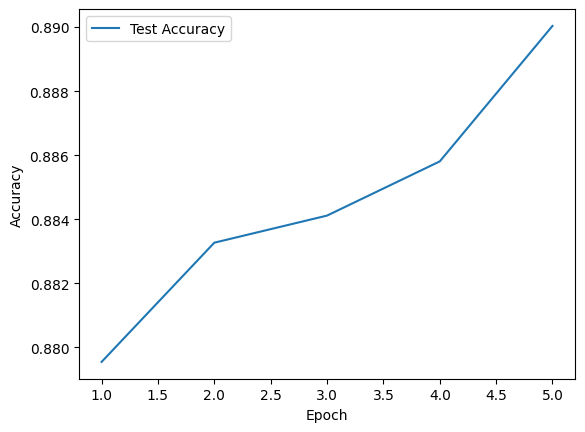

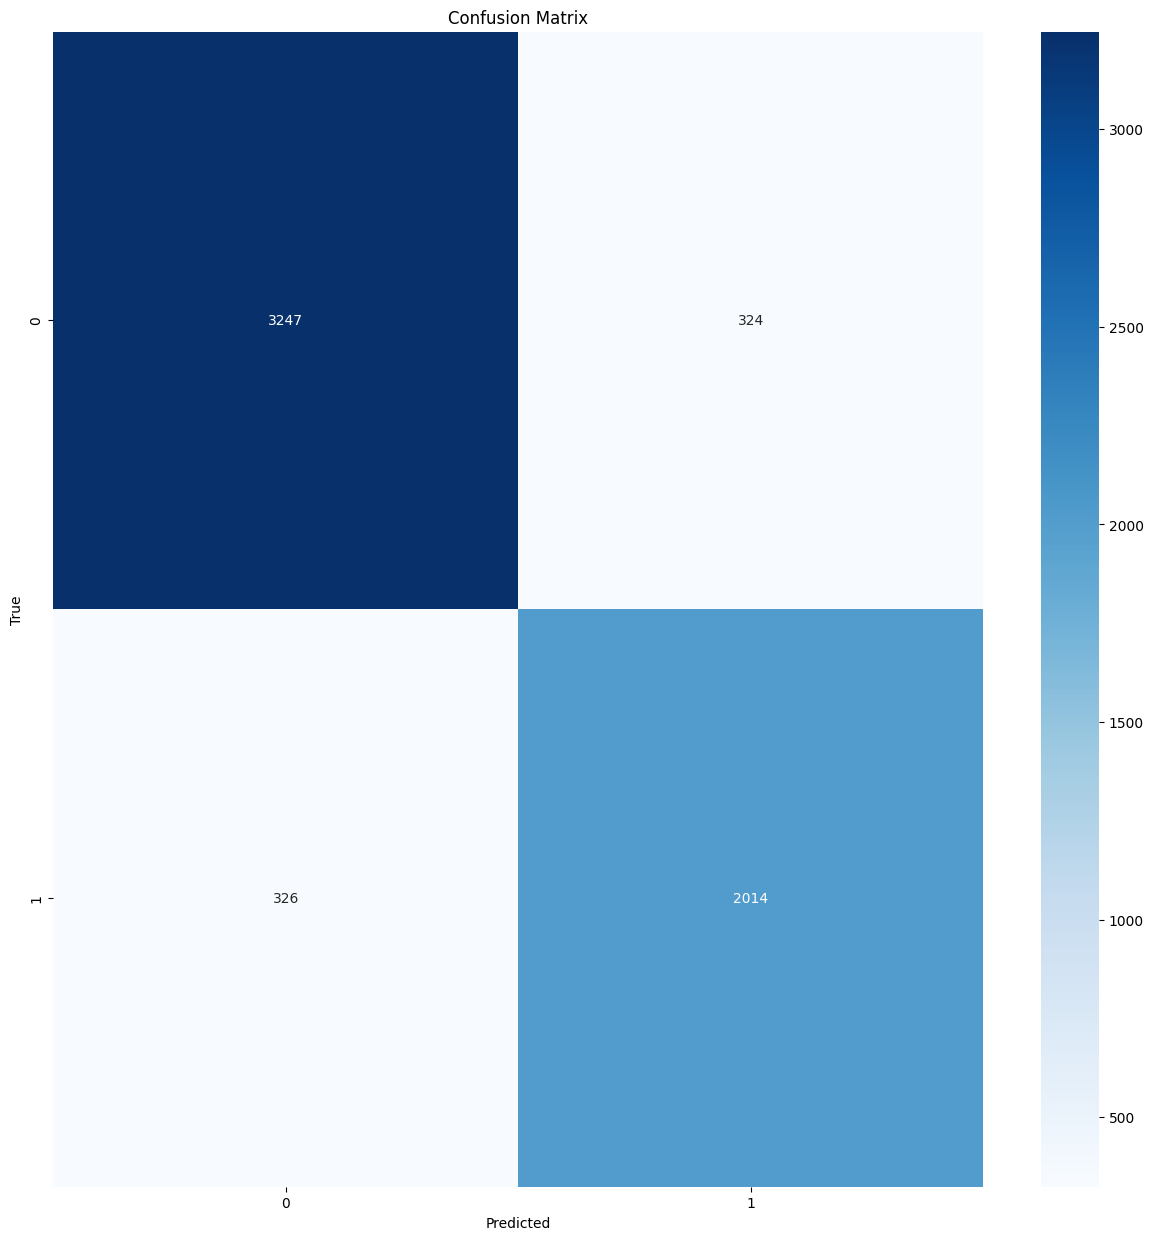

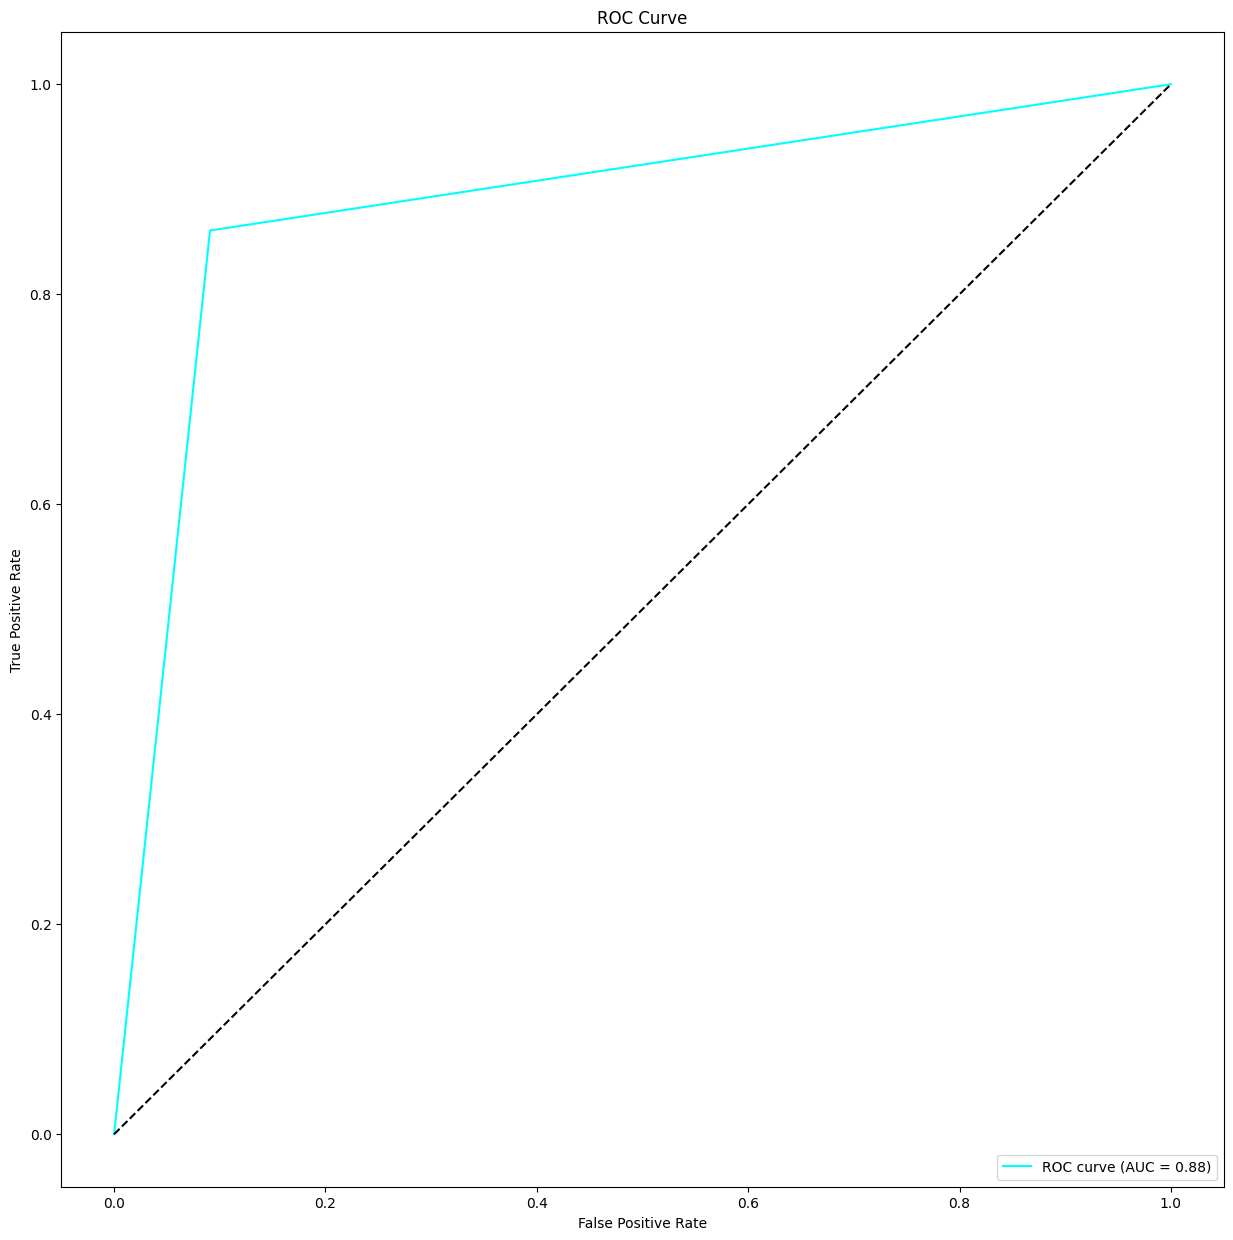

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      3571
         1.0       0.86      0.86      0.86      2340

    accuracy                           0.89      5911
   macro avg       0.89      0.88      0.89      5911
weighted avg       0.89      0.89      0.89      5911



In [11]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, output_size, num_epochs=5, multilabel=multilabel, report=True)